In [3]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import imageio.v2 as imageio # Throws warning otherwise
from matplotlib import pyplot as plt

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt

# Using a Neural Network to Fit the Data
- Jackson Cown
- 7/5/2022


This chapter covers:
- Nonlinear activation functions as the key difference compared to linear models
- Working with PyTorch's ```nn``` module
- Solving a linear-fit problem with a neural network


Post Chapter Summary:
- Neural networks can be automatically adapted to specialize themselves on the problem at hand.
- Neural networks allow easy access to the analytical derivatives of the loss with respect to any parameter in the model, which makes evolving the parameters very efficient. Thanks to its automated differentiation engine, PyTorch provides such derivatives effortlessly.
- Activation functions around linear transformations make neural netowrks capable of appoximating highly nonlinear function, at the same time keeping them simple enough to optimize.
- The ```nn``` module together with ther tensor standard library provide all the building blocks for creating neural networks.
- To recognize overfitting, it's essential to maintain the training set of data points separate from the validation set. There's no one recipe to combat overfitting, but getting more data, or more variability in the data, and resorting to simpler models are good starts.
- Anyone doing data science should be plotting all the time.

## Last Chapter:
- We focused on simple linear models to demonstrate the fundamentals of learning from data.
- We emphasized simple regression examples as well as the importance of having a valid partition of training data

## Now:
- We focus on the general learning formula for neural networks, and how proper composition of non-linear activation functions can aggregate intelligently to approximate any function.
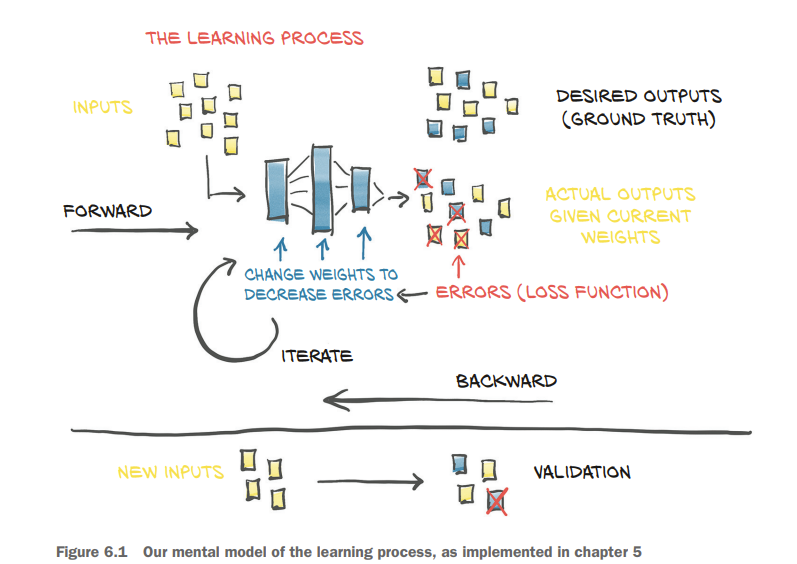

## Artificial Neurons
- The term *Neural Network* implies a collection of artificial neurons, and a suggestive link to the way our brain works
    - although as NNs continue to evolve, the diverge from natural brain activity into their own niche
        - It seems that both artificial and organic neurons use vaguely similar mathematical strategies for approximating complex functions. (Because it works well)
- Neuron: The basic building block of these networks
    - Nothing but a linear transformation of the input followed by a fixed nonlinear function (Activation function)
    - Mathematically denoted as: `output = f((w * x) + b)
        - x is the input, w is the learned parameter matrix, and bias is typically a scalar value (not always) to offset the intercept of the model
        - f here is the activation function (tanh/sigmoid/ReLU/.../etc.)
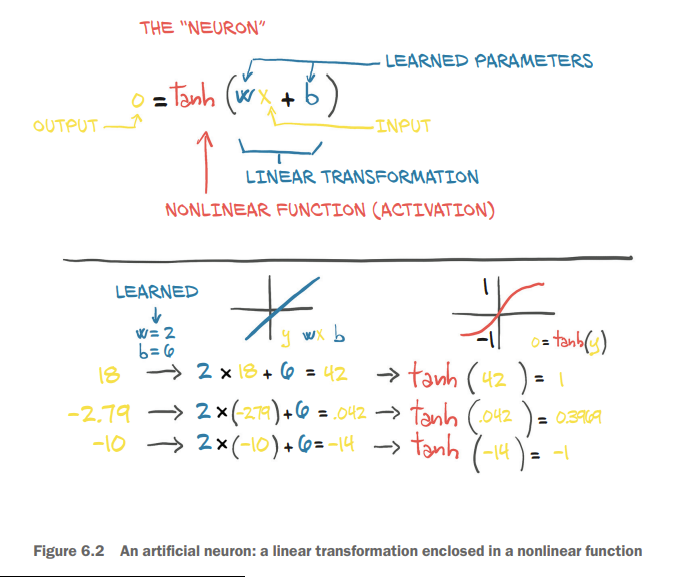

## Composing a Multilayer Network
- Most neural networks consist of many many neurons working together to model data.
- A multilayer network is essentially just a composition of single neurons, allowing us to backpropagate through the network efficiently and coherently:
    - Denoted as follows:
        - `x_1 = f((w_0 * x_0) + b_0)`
        - `x_2 = f((w_1 * x_1) + b_1)`
        - **...**
        - `y = f((w_n * x_n) + b_n)`
    - Remember: in this case, `w_0` is a matrix, and `x_0` is a vector. Taking this form allows `w_0` to consist of an entire layer of neurons, rather than just a single weight.
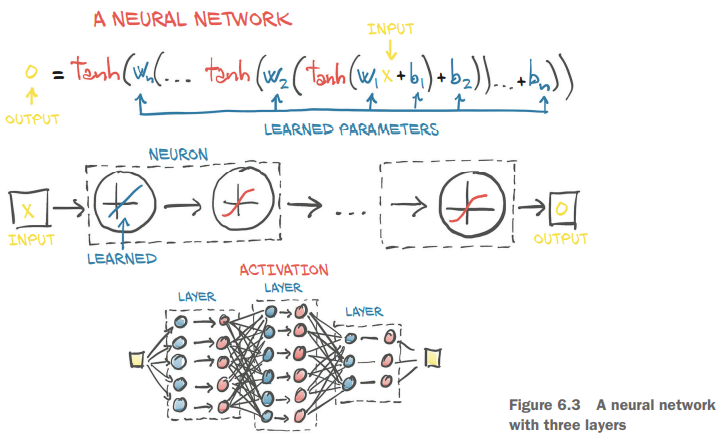


## Understanding the Error Function
- Import: The shape of the error function
    - The linear model and error-squared loss function were decidely convex in nature, with a single globally defined minimum
        - In problems like this, we can forego gradient descent and actually achieve a direct, unique, best solution for the parameters. Unfortunately, neural networks are infamously non-convex